# Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Скачайте данные

In [103]:
df = pd.read_csv('kc_house_data.csv', encoding='windows-1251', index_col='id', parse_dates=['date'], dayfirst=False)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1.2. Изучите стоимости недвижимости

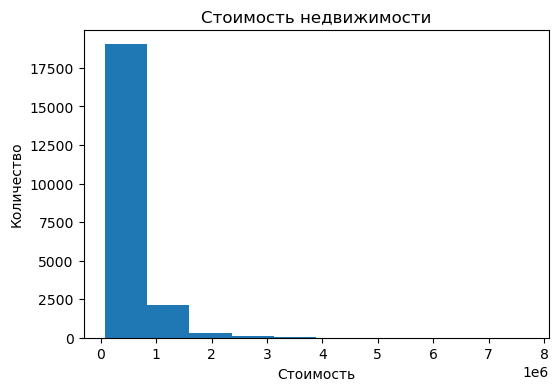

In [6]:
plt.figure(figsize = (6,4))
plt.hist(df['price'], bins = 10)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

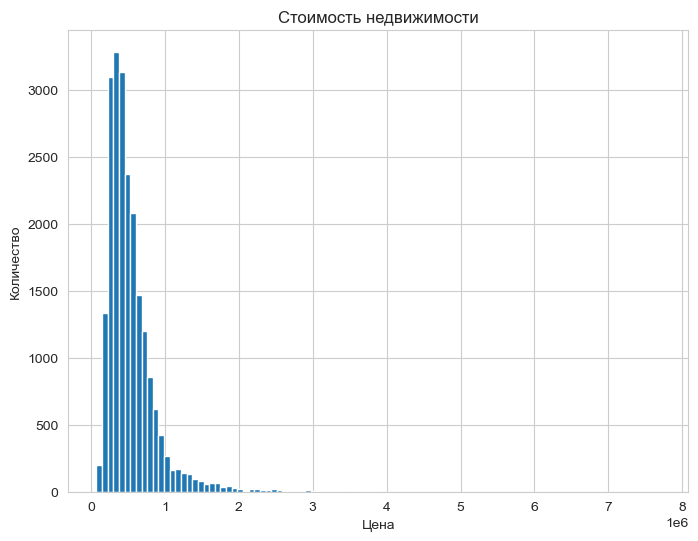

In [116]:
plt.figure(figsize=(8,6))

plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

## Выводs:

- Колличество домов прямо пропорционально их цене
- В основном большое количество недвижимости продается по цене до 1 000 000, основная часть недвижимости продается по цене до 2 000 000 

## 1.3. Изучите распределение квадратуры жилой

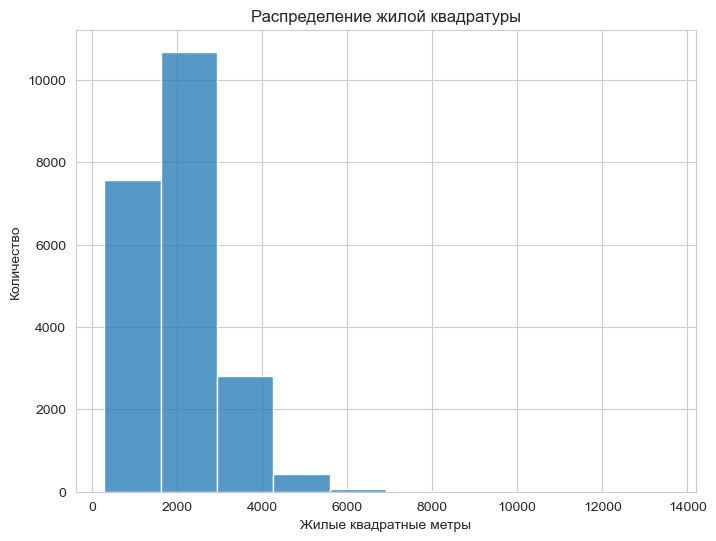

In [114]:
plt.figure(figsize = (8,6))
sns.histplot(df['sqft_living'], bins = 10)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

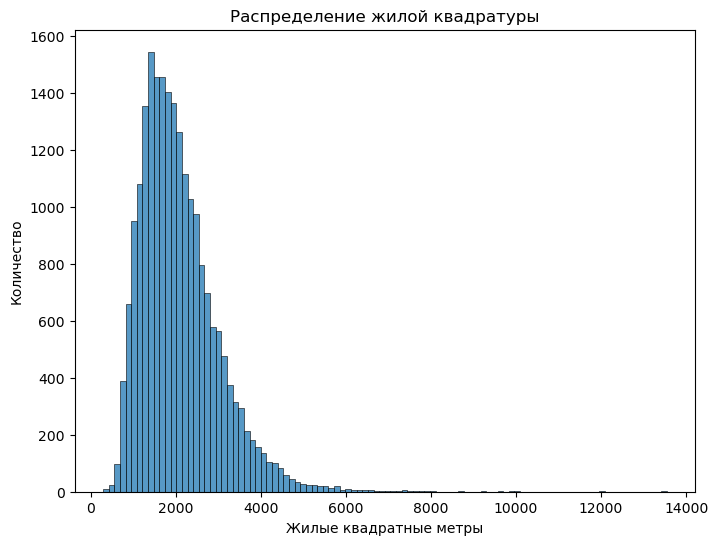

In [11]:
plt.figure(figsize = (8,6))
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

## Выводы:
- Максимальное количество недвижимости продается с жилой площадью от 1700 до 2300 кв.м., 
- Основная часть недвижимости продается с жилой площадью от 500 до 6000 кв.м.

## 1.4. Изучите распределение года постройки

In [19]:
data_y = df['yr_built'].value_counts(ascending=True)
data_y.head()

1934    21
1935    24
1902    27
1901    29
1933    30
Name: yr_built, dtype: int64

In [21]:
years_list = [1900+i*10 for i in range (0,13)]

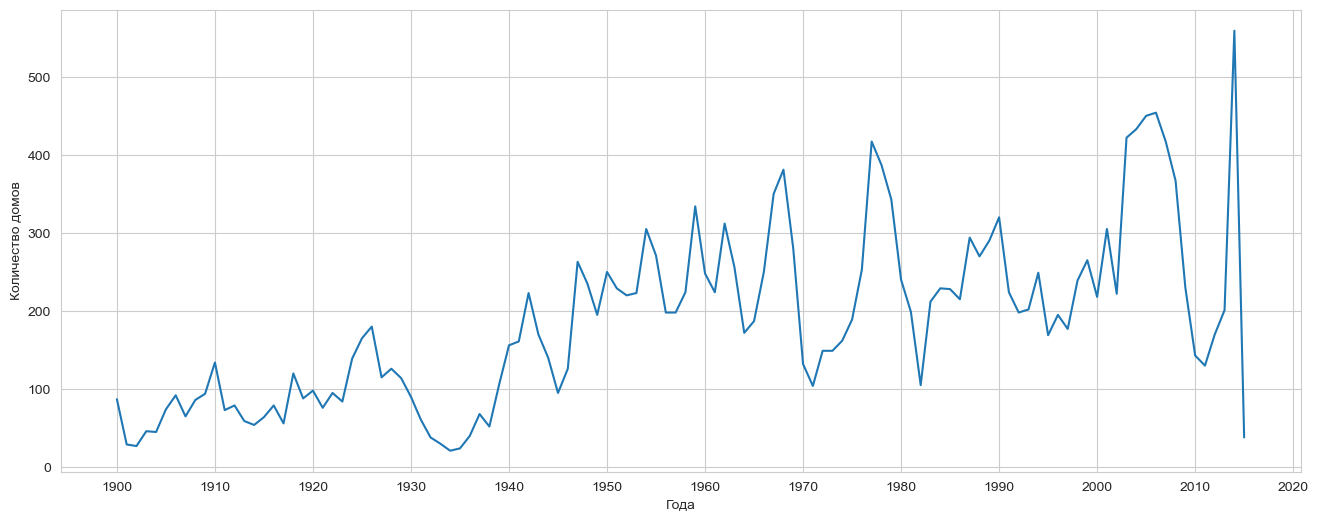

In [27]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
sns.lineplot(data=data_y, x=names,y=values)
plt.xlabel('Года')
plt.ylabel('Количество домов')
plt.xticks(ticks=years_list);


## Выводы
- В середине 1930 гг, в начале 1970 гг и в начале 2010 гг в строительстве домов был кризис

# 2 задача
## 2.1. Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

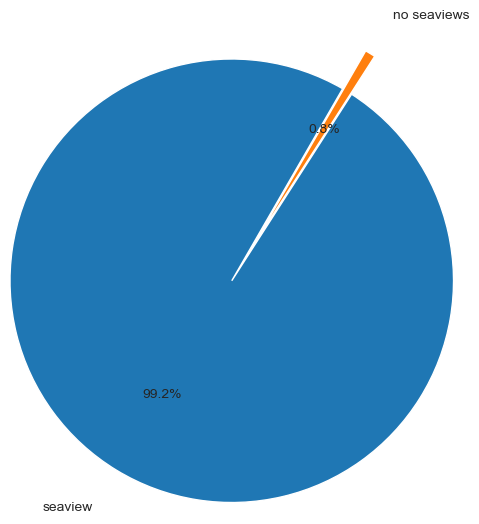

In [29]:
data_view = df['waterfront'].value_counts()
val = data_view.values
plt.pie(val,labels=['seaview', 'no seaviews'],explode=[0,0.3],
        radius = 1.5, startangle=60,
        labeldistance=1.2, autopct='%.1f%%');

## Вывод
- Менее 1% домов продается с видом на набережную

## 2.2. Изучите распределение этажей домов


In [40]:
data_fl = df['floors'].value_counts(normalize=True)*100
data_fl

1.00                  49.41
2.00                  38.13
1.50                   8.84
3.00                   2.84
2.50                   0.74
3.50                   0.04
Name: floors, dtype: float64

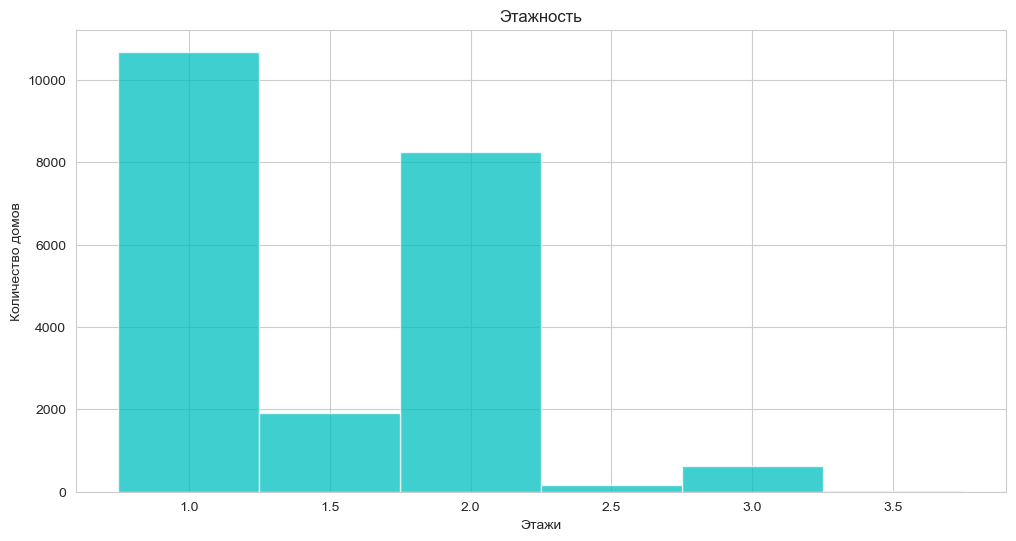

In [39]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.5, facecolor='c', alpha=0.75)
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(True)
plt.show()

#### plt.figure(figsize=(10,10))
plt.pie(data_fl.values, autopct='%1.2f%%', labels=data_fl.index)
plt.legend(data_fl.index)
plt.title('Распределение этажей домов');

## Выводы
- В основном дома одноэтажные и двухэтажные.
- Половина домов в продаже составляют одноэтажные дома (49,41%)

## 2.3. Изучите распределение состояния домов

In [63]:
# condition - Значение от 1 до 5 насколько хорошее состояние
data_c = df['condition'].value_counts(normalize=False)
data_c.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

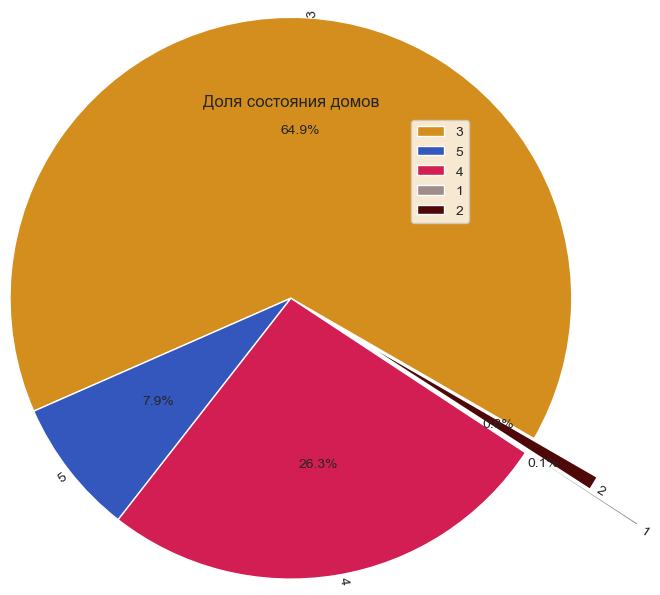

In [72]:
data_c = df['condition'].value_counts(sort=False)
# data_c
cond_val= data_c.values
cond_ind = data_c.index
cond_explode = [0,0,0,0.9,0.5]
colors = ["#d38e1e", "#3457bd", "#d31e53","#a18c8c", "#4f0808"]
plt.title("Доля состояния домов")
plt.pie(cond_val, labels=cond_ind, radius = 1.9,
        startangle=-30, colors=colors, explode = cond_explode,
        rotatelabels=True,
        labeldistance=1.0, autopct='%.1f%%')
plt.legend(data_c.index);
plt.show;

# Выводы
- Большая часть домов находится в среднем состоянии (на 3)
- В плохом состоянии находится незначительная часть домов (менее 1%)

# 3 задача
## Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
## Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [73]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

C:\Users\andre\AppData\Local\Temp\ipykernel_11612\4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00,0.30,0.50,0.70,0.00,0.30,0.30,0.40,0.00,0.70,0.60,0.30,0.00,0.00,0.00,0.30,0.00,0.60,0.00
bedrooms,0.30,1.00,0.50,0.60,0.00,0.00,0.00,0.00,0.00,0.40,0.50,0.30,0.00,0.00,0.00,0.00,0.00,0.40,0.00
bathrooms,0.50,0.50,1.00,0.80,0.00,0.50,0.00,0.00,0.00,0.70,0.70,0.30,0.50,0.00,0.00,0.00,0.00,0.60,0.00
sqft_living,0.70,0.60,0.80,1.00,0.00,0.40,0.00,0.30,0.00,0.80,0.90,0.40,0.30,0.00,0.00,0.00,0.00,0.80,0.00
sqft_lot,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70
floors,0.30,0.00,0.50,0.40,0.00,1.00,0.00,0.00,-0.30,0.50,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.30,0.00
waterfront,0.30,0.00,0.00,0.00,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.40,0.00,0.00,0.30,0.00,0.00,0.40,1.00,0.00,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.30,0.00
condition,0.00,0.00,0.00,0.00,0.00,-0.30,0.00,0.00,1.00,0.00,0.00,0.00,-0.40,0.00,0.00,0.00,0.00,0.00,0.00
grade,0.70,0.40,0.70,0.80,0.00,0.50,0.00,0.30,0.00,1.00,0.80,0.00,0.40,0.00,0.00,0.00,0.00,0.70,0.00


Text(0.5, 1.0, 'Тепловая карта корреляции')

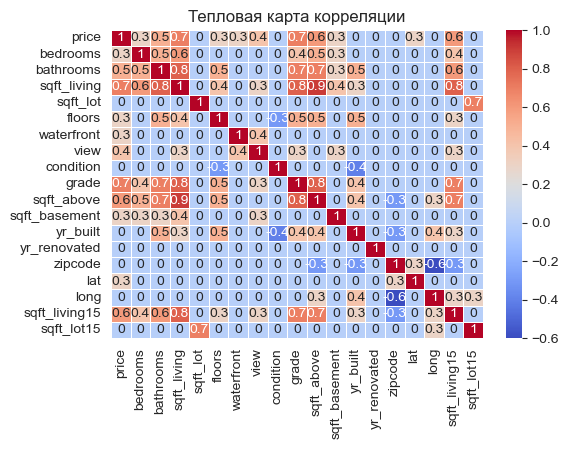

In [75]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, linewidths = 0.5, cmap='coolwarm')
plt.title('Тепловая карта корреляции')

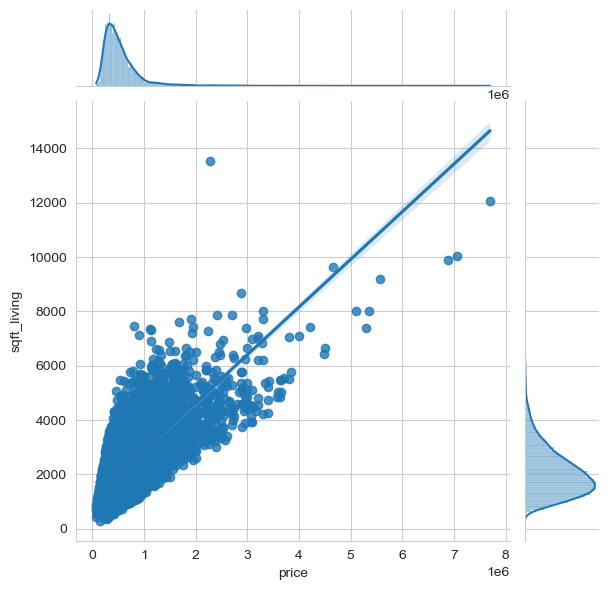

In [85]:
# sqft_living - Кв. метры жилые
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

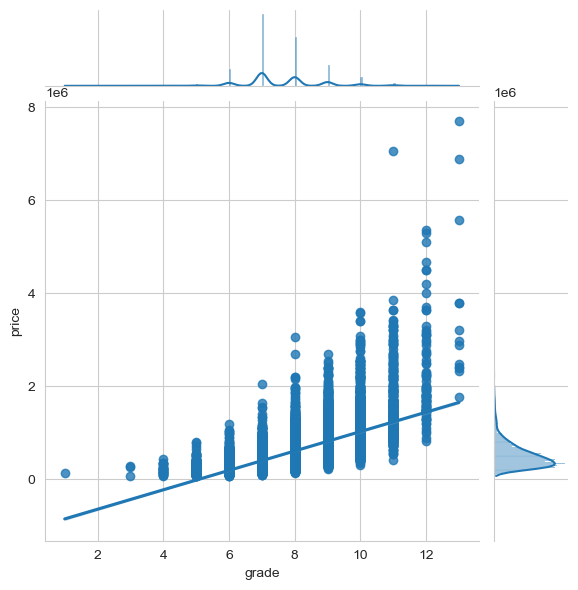

In [108]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

- Чем выше качество конструкций, тем выше цена дома

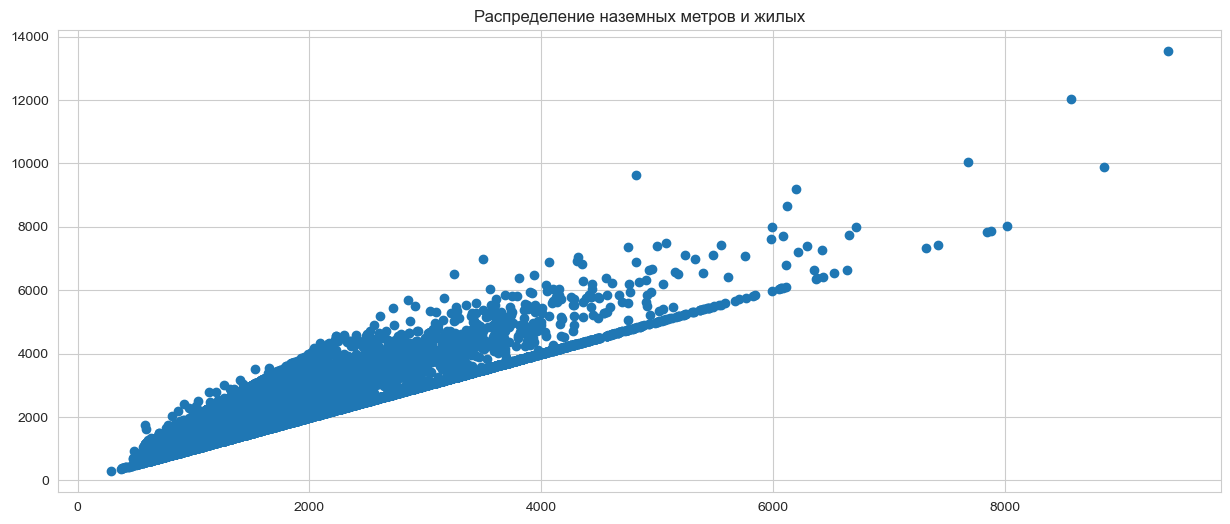

In [112]:
plt.figure(figsize=(15, 6))
plt.scatter(df['sqft_above'], df['sqft_living'])
plt.title('Распределение наземных метров и жилых');

- Жилые метры находятся в прямой зависимости от показатля метров над уровнем земли

In [105]:
data1 = df.groupby('yr_built')['price'].mean().reset_index()
data1

,yr_built,price
0,1900,"581,387.21"
1,1901,"556,935.93"
2,1902,"673,007.41"
3,1903,"480,958.20"
4,1904,"583,756.64"
...,...,...
111,2011,"544,522.00"
112,2012,"527,447.34"
113,2013,"678,545.45"
114,2014,"683,681.75"


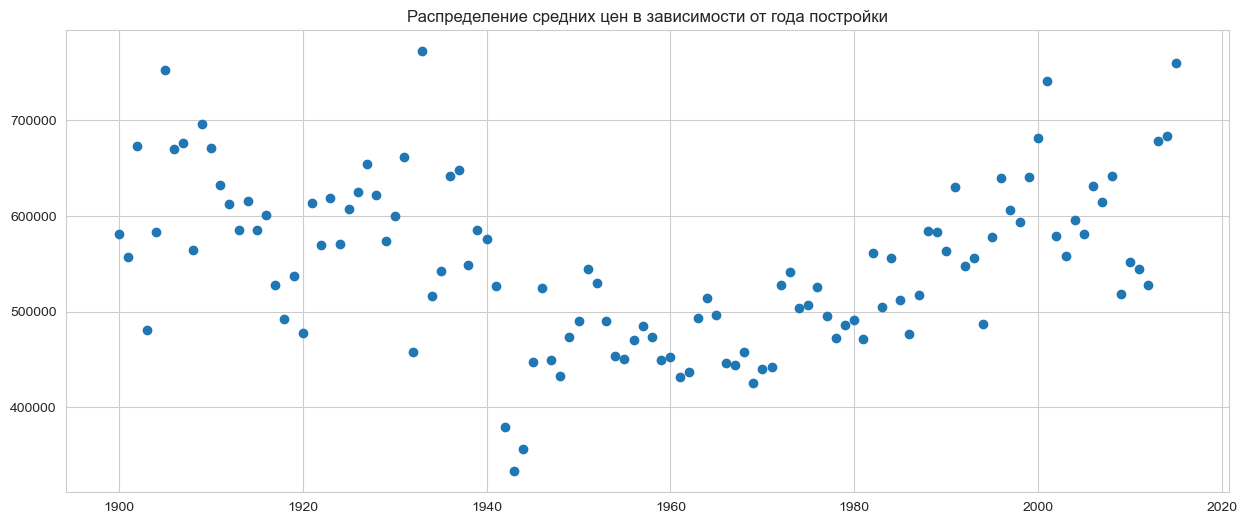

In [107]:
plt.figure(figsize=(15, 6))
plt.scatter(data1['yr_built'], data1['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

- Более старые дома имеют высокую цену: на уровне более новых построек. 

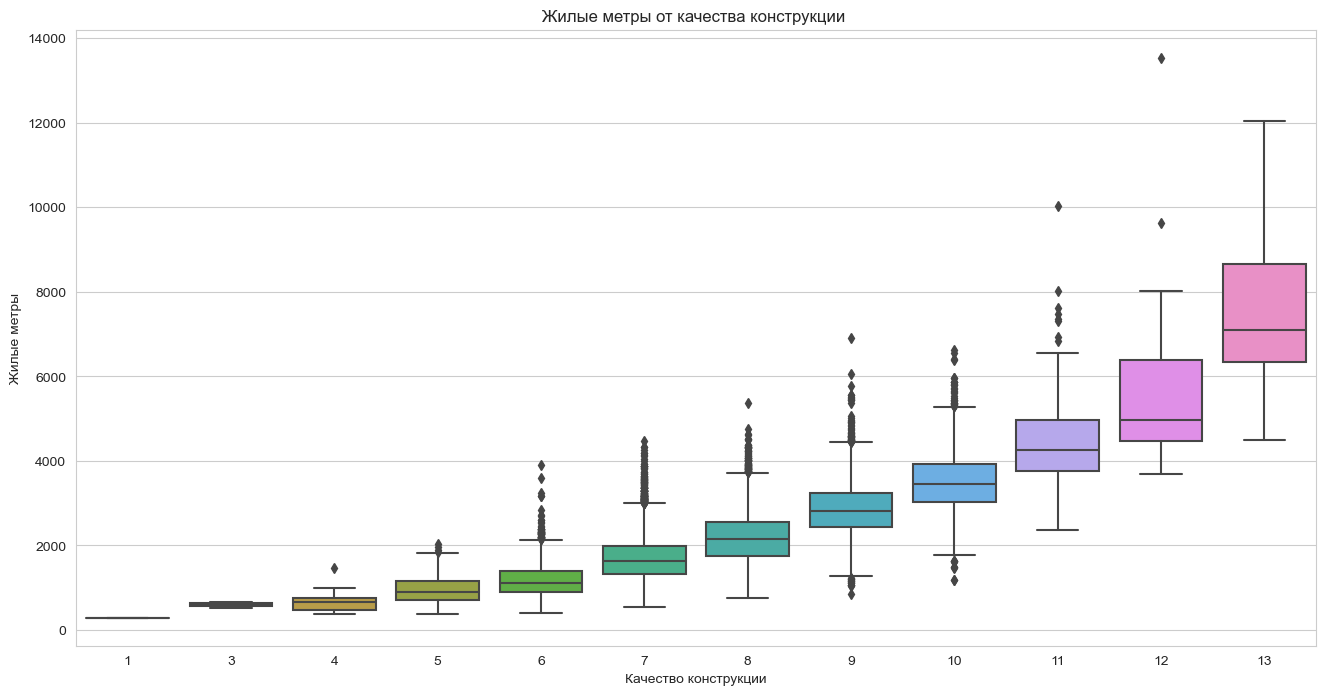

In [96]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['grade'], y=df['sqft_living'], whis=1.5)
 
plt.xlabel('Качество конструкции')
plt.ylabel('Жилые метры')
plt.title('Жилые метры от качества конструкции ');

- С увеличением качества конструкции домов растет количество жилых метров 